C:\Users\Krishna\AppData\Local\Temp\ipykernel_3396\4141155948.py:43: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, animate, interval=1000)


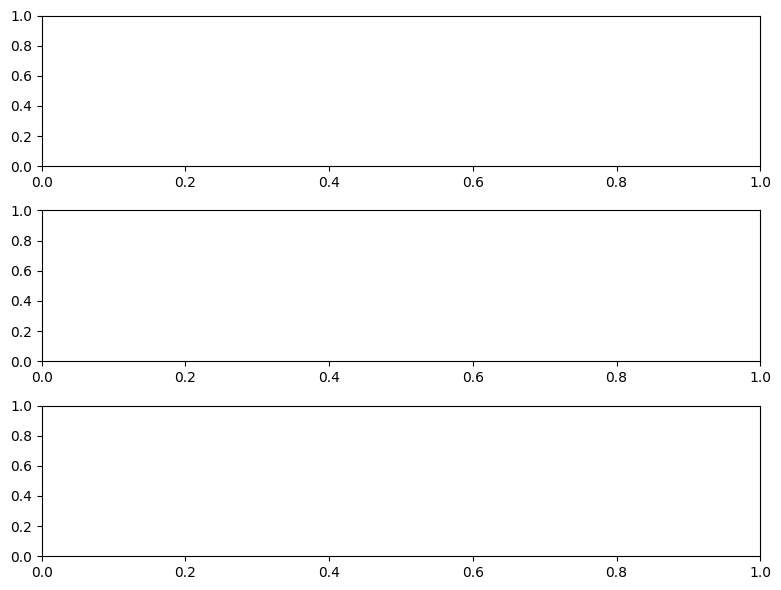

In [2]:
import serial
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ser = serial.Serial('COM5', 9600)  # COM port match karo Arduino wale se

pm_values = []
gas_values = []
temp_values = []

def animate(i):
    line = ser.readline().decode().strip()
    try:
        pm, gas, temp = map(int, line.split(","))
        pm_values.append(pm)
        gas_values.append(gas)
        temp_values.append(temp)

        if len(pm_values) > 50:
            pm_values.pop(0)
            gas_values.pop(0)
            temp_values.pop(0)

        ax1.clear()
        ax2.clear()
        ax3.clear()

        ax1.plot(pm_values, label="PM2.5", color="red")
        ax2.plot(gas_values, label="MQ135", color="green")
        ax3.plot(temp_values, label="Temperature", color="blue")

        ax1.legend()
        ax2.legend()
        ax3.legend()

        ax1.set_ylabel("PM2.5")
        ax2.set_ylabel("Gas Level")
        ax3.set_ylabel("Temp (°C)")
    except:
        pass

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6))
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.tight_layout()
plt.show()
